# Introduction
In this analysis, we delve into the purchasing behavior of customers with a focus on chip products. We have been engaged by the Category Manager for Chips at Quantium to gain a comprehensive understanding of the types of customers who buy chips and to explore their purchasing patterns within the region. The insights derived from this analysis will play a crucial role in shaping the strategic direction of the chip category for the upcoming half year.

# About the Datasets

The Task contains 2 dataset i.e Transaction_data  and Purchase_behaviour.When combined we get the following columns

DATE:  The date of the transaction.

STORE_NBR: Store number, identifying which store the transaction took place in. 

LYLTY_CARD_NBR: Loyalty card number, which identifies the customer. 

TXN_ID: Transaction ID, a unique identifier for each transaction.

PROD_NBR: Product number, identifying which product was purchased.

PROD_NAME: Name or description of the product.

PROD_QTY: Quantity of the product purchased in the transaction.

TOT_SALES: Total sales amount for the transaction.

LIFESTAGE: Customer attribute identifying the stage of life they are in (e.g., young singles/couples, retirees, etc.). 

PREMIUM_CUSTOMER: Customer segmentation based on purchasing behavior and preferences (e.g., budget, mainstream, premium).


## Import Libraries

In [1]:
#for data cleaning
import pandas as pd 
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the Transaction data
df=pd.read_excel("./Desktop/FORAGE INTERNSHIPS/Quantium/QVI_transaction_data.xlsx")

In [3]:
#shape of the data
df.shape

(264836, 8)

The tuple returned (264836, 8), which means the data has 264836 rows and 8 columns

In [4]:
#Load the Purchase behaviour dataset
data=pd.read_csv("./Desktop/FORAGE INTERNSHIPS/Quantium/QVI_purchase_behaviour.csv")

In [5]:
data.shape


(72637, 3)

This shows that the Dataset has 72637 rows and 3 columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


We can se that DATE column is an integer instead of a Datetime datattype.This needs to be converted to the right format

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


 Both datasets have the LYLTY_CARD_NBR column which will be the key to merge them togethe

# Data Cleaning

## Handling Missing Values NaN
1.NaN also known as Not a Number represent missing values in te data that cannot be converted into any datatype other than float.

2.Missing values occur when no information is provided for one or more feautures or for the entire unit.

3.NaN values can impact various data operations, such as arithmetic computations, statistical analysis, and machine learning algorihms, skew results and introduce bias in satistical meausures like mean, median and correlations

In [10]:
#Check for missing values on transaction dataset
df.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

We can see that the dataset contains No missing values on all the columns

In [11]:
#check for missing values on purchase behaviour dataset
data.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no missing values in the dataset

### Converting DATE integer to datetime
1.The numbers provided in the DATE column, like 43390 and 43329, are likely in Excel's date format. Excel represents dates as the number of days since January 1, 1900 (with some exceptions for handling leap years).

2.To convert these Excel date numbers into a more human-readable date format, we can use the 'xlrd' library in Python.

In [12]:
import xlrd
from datetime import datetime

def convert_excel_date(excel_date):
    date_value = xlrd.xldate_as_tuple(excel_date, 0)
    return datetime(*date_value)

# Assuming 'df' is your DataFrame and 'Date' is the column containing Excel date numbers
df['DATE'] = df['DATE'].apply(convert_excel_date)

In [13]:
df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


### Saving the Transaction Data Excel file as a CSV file

In [14]:
df.to_csv('QVI_Transaction_data.csv', index=False)

# Combining the two datasets for EDA
1.Both datasets have the LYLTY_CARD_NBR column which will be the key to merge them together.

2.We use pd.merge(): a function provided by the pandas library for combining two DataFrames based on a common column or index.

3.This operation is useful for combining information from two datasets based on a common identifier (in this case, 'LYLTY_CARD_NBR'). It's commonly used in data manipulation and analysis tasks.

In [15]:
combined_df =pd.merge(df, data, on='LYLTY_CARD_NBR', how='left')

In [16]:
#Save the combined dataframe
combined_df.to_csv('combined_Chips_Sales_data.csv', index=False)

In [17]:
#check data in the new dataset
combined_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [18]:
#check for missing values
combined_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are no missing values in all the columns of the combined dataframe meaning all rows were matched based on column LYLTY_CARD_NBR

In [19]:
combined_df.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:12.879215616,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
min,2018-07-01 00:00:00,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226


# EDA

EDA typically involves generating descriptive statistics, visualizing data distributions, and identifying relationships between variables. It's an essential step in the data analysis process, as it helps analysts and data scientists get a sense of what the data is actually saying before proceeding to more complex modeling or hypothesis testing.

#### Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?

In [20]:
# Group by lifestage and premium customer, and calculate total sales
total_sales_by_segment = combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()

# Find the segment with the highest total sales
top_spender_segment = total_sales_by_segment.idxmax()
top_spender_total_sales = total_sales_by_segment.max()

print(f"The segment '{top_spender_segment}' spends the most on chips with a total sales of ${top_spender_total_sales:.2f}.")

The segment '('OLDER FAMILIES', 'Budget')' spends the most on chips with a total sales of $168363.25.


#### How many customers are in each segment

LIFESTAGE
OLDER SINGLES/COUPLES     54479
RETIREES                  49763
OLDER FAMILIES            48596
YOUNG FAMILIES            43592
YOUNG SINGLES/COUPLES     36377
MIDAGE SINGLES/COUPLES    25110
NEW FAMILIES               6919
Name: count, dtype: int64


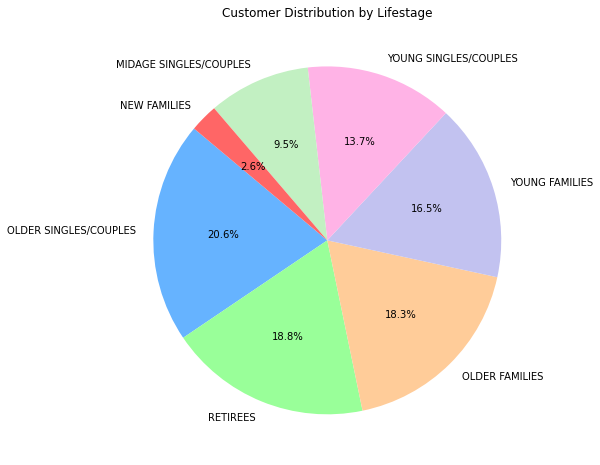

In [21]:
# Count the number of customers in each lifestage category
lifestage_counts = combined_df['LIFESTAGE'].value_counts()
print(lifestage_counts)

# Create a pie chart to visualize the distribution of customers by lifestage
plt.figure(figsize=(8, 8))
plt.pie(lifestage_counts, labels=lifestage_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#ff6666'])
plt.title('Customer Distribution by Lifestage')
plt.show()


Older singles/couples contribute to a large number of customers. This suggests that catering to the preferences and needs of "Older Singles/Couples" is important for the store's success. 

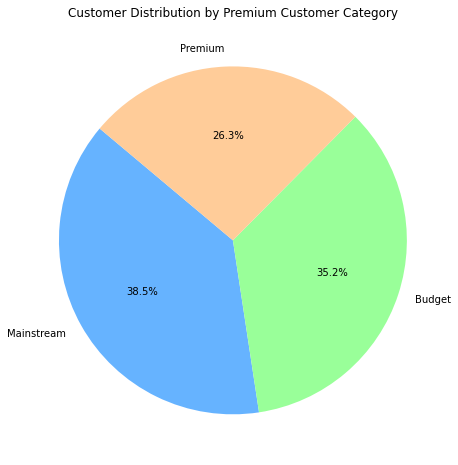

In [22]:
# Count the number of customers in each premium customer category
premium_customer_counts = combined_df['PREMIUM_CUSTOMER'].value_counts()

# Create a pie chart to visualize the distribution of customers by premium customer category
plt.figure(figsize=(8, 8))
plt.pie(premium_customer_counts, labels=premium_customer_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Customer Distribution by Premium Customer Category')
plt.show()

The higher number of Mainstream customers compared to Budget and Premium customers suggests that the majority of the customer base falls under the Mainstream category. This could indicate that the store's marketing and product offerings are more in line with the preferences and needs of Mainstream customers.

In [23]:
# Count the number of unique customers in each segment
customer_count_by_segment = combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique()
print(customer_count_by_segment)

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              1504
                        Mainstream          3340
                        Premium             2431
NEW FAMILIES            Budget              1112
                        Mainstream           849
                        Premium              588
OLDER FAMILIES          Budget              4675
                        Mainstream          2831
                        Premium             2274
OLDER SINGLES/COUPLES   Budget              4929
                        Mainstream          4930
                        Premium             4750
RETIREES                Budget              4454
                        Mainstream          6479
                        Premium             3872
YOUNG FAMILIES          Budget              4017
                        Mainstream          2728
                        Premium             2433
YOUNG SINGLES/COUPLES   Budget              3779
                        Main

#### How many chips are bought per customer by segment?

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              6.313830
                        Mainstream          6.796108
                        Premium             6.386672
NEW FAMILIES            Budget              5.009892
                        Mainstream          5.087161
                        Premium             5.028912
OLDER FAMILIES          Budget              9.639572
                        Mainstream          9.804309
                        Premium             9.749780
OLDER SINGLES/COUPLES   Budget              7.145466
                        Mainstream          7.098783
                        Premium             7.154947
RETIREES                Budget              6.458015
                        Mainstream          6.253743
                        Premium             6.426653
YOUNG FAMILIES          Budget              9.238486
                        Mainstream          9.180352
                        Premium             9.209207
YOUNG

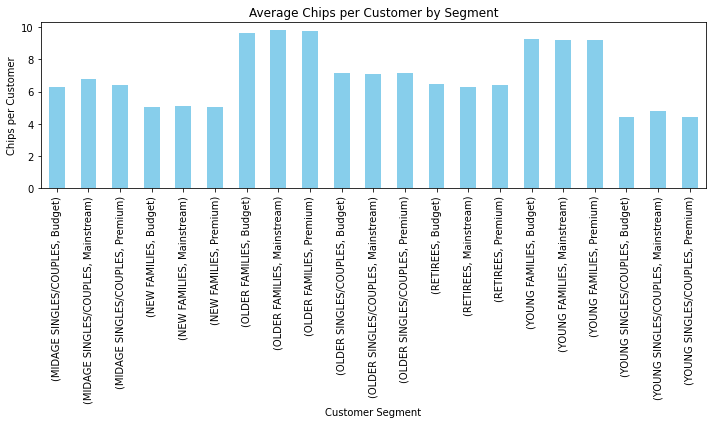

In [24]:
# Group by lifestage and premium customer, and calculate total quantity of chips
total_chips_by_segment = combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()

# Divide total chips by number of customers in each segment to get chips per customer
chips_per_customer_by_segment = total_chips_by_segment / customer_count_by_segment
print(chips_per_customer_by_segment)

import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(10, 6))
chips_per_customer_by_segment.plot(kind='bar', color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Chips per Customer')
plt.title('Average Chips per Customer by Segment')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the plot
plt.show()



"OLDER FAMILIES" tend to buy more chips on average compared to other segments, regardless of their premium customer category. On the other hand, "YOUNG SINGLES/COUPLES" tend to buy fewer chips on average. 

#### What's the average chip price by customer segment

In [25]:
# Calculate average chip price by dividing total sales by total quantity of chips
average_chip_price_by_segment = total_sales_by_segment / total_chips_by_segment
print(average_chip_price_by_segment)


LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Budget              3.739975
                        Mainstream          4.000346
                        Premium             3.763535
NEW FAMILIES            Budget              3.936178
                        Mainstream          3.939315
                        Premium             3.886067
OLDER FAMILIES          Budget              3.736009
                        Mainstream          3.726962
                        Premium             3.696649
OLDER SINGLES/COUPLES   Budget              3.883299
                        Mainstream          3.811578
                        Premium             3.891695
RETIREES                Budget              3.933660
                        Mainstream          3.842170
                        Premium             3.924050
YOUNG FAMILIES          Budget              3.754840
                        Mainstream          3.705029
                        Premium             3.750134
YOUNG

Mainstream Young Singles/Couples are willing to pay more for chips compared to other segments.

# Drivers of Sales

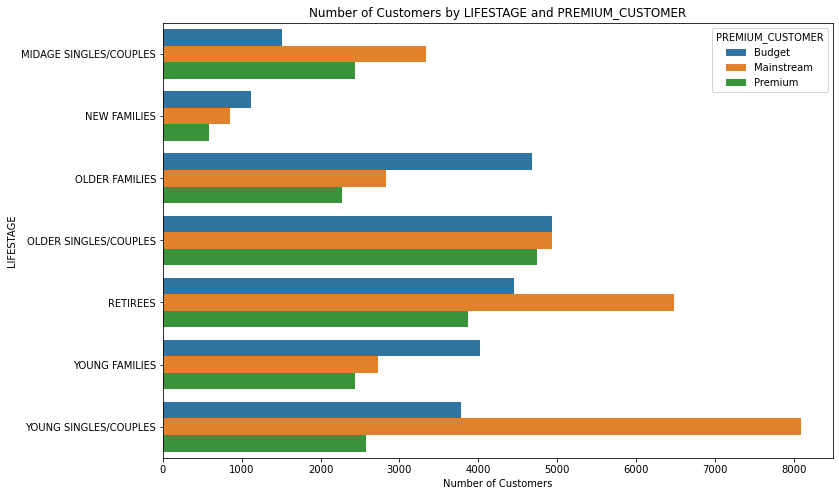

In [26]:
# Calculate the summary of the number of customers by LIFESTAGE and PREMIUM_CUSTOMER
customer_summary = combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='LYLTY_CARD_NBR', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=customer_summary, orient='h')
plt.title('Number of Customers by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Number of Customers')
plt.ylabel('LIFESTAGE')
plt.show()

There are more Mainstream - young singles/couples and Mainstream - retirees who buy
chips. This contributes to there being more sales to these customer segments.

This insight provides valuable information for marketing and sales strategies. For example, focusing on promotional activities or tailored product offerings for "Mainstream - Young Singles/Couples" and "Mainstream - Retirees" could potentially yield higher returns, as they are the major contributors to chip sales.

Conversely, for the "Budget - Older Families" segment, other product categories or marketing approaches may be more effective in driving sales.

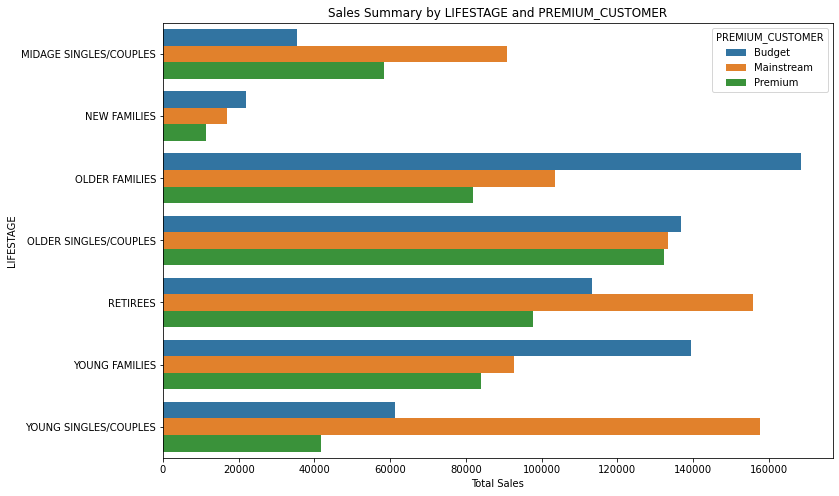

In [27]:
# Calculate summary of sales by LIFESTAGE and PREMIUM_CUSTOMER
sales_summary = combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='TOT_SALES', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=sales_summary, orient='h')
plt.title('Sales Summary by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Total Sales')
plt.ylabel('LIFESTAGE')
plt.show()


Sales are coming mainly from Budget - older families, Mainstream - young
singles/couples, and Mainstream - retirees

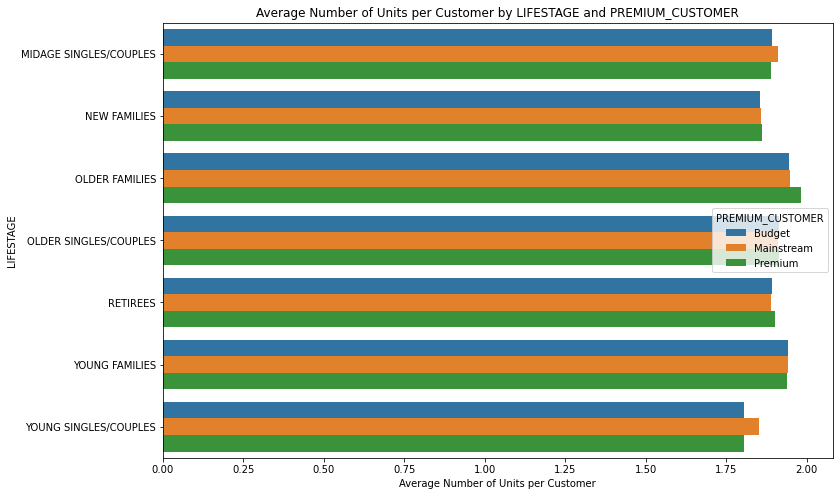

In [28]:
# Calculate average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units_per_customer = combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='PROD_QTY', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_units_per_customer, orient='h')
plt.title('Average Number of Units per Customer by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Average Number of Units per Customer')
plt.ylabel('LIFESTAGE')
plt.show()


Older families and young families in general buy more chips per customer

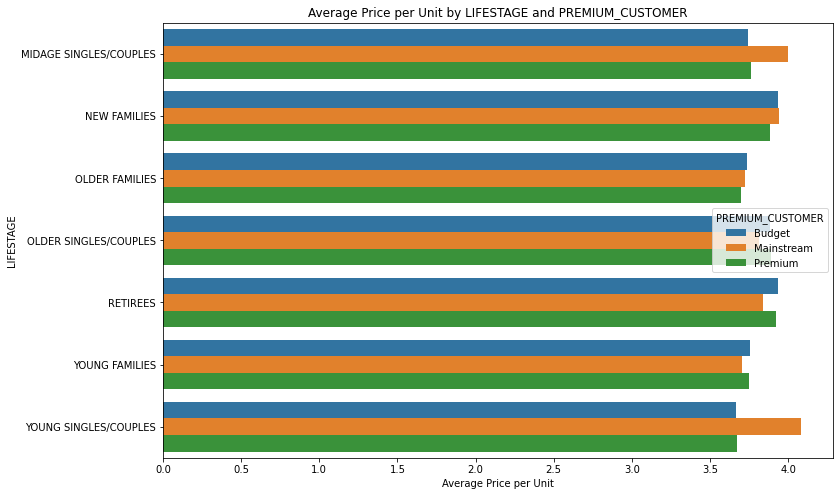

In [29]:
# Calculate average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
avg_price_per_unit = combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].mean() / combined_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean()
avg_price_per_unit = avg_price_per_unit.reset_index()
avg_price_per_unit.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_PRICE_PER_UNIT']

import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='AVG_PRICE_PER_UNIT', y='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=avg_price_per_unit, orient='h')
plt.title('Average Price per Unit by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Average Price per Unit')
plt.ylabel('LIFESTAGE')
plt.show()


Mainstream midage and young singles and couples are more willing to pay more per
packet of chips compared to their budget and premium counterparts. This may be due
to premium shoppers being more likely to buy healthy snacks and when they buy
chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and
couples buying chips compared to their mainstream counterparts.

## Independent t-test between different customer segments

A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.




If t-value is large => the two groups belong to different groups. 
If t-value is small => the two groups belong to same group.


In [30]:
from scipy import stats

# Assuming you have a DataFrame called 'combined_df'

# Separate Data into Groups
mainstream = combined_df[combined_df['PREMIUM_CUSTOMER'] == 'Mainstream']
premium = combined_df[combined_df['PREMIUM_CUSTOMER'] == 'Premium']
budget_midage = combined_df[(combined_df['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (combined_df['PREMIUM_CUSTOMER'] == 'Budget')]
young_singles_couples = combined_df[combined_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES']

# Perform t-test
t_stat_mainstream_premium, p_value_mainstream_premium = stats.ttest_ind(mainstream['TOT_SALES'], premium['TOT_SALES'])
t_stat_budget_midage_young, p_value_budget_midage_young = stats.ttest_ind(budget_midage['TOT_SALES'], young_singles_couples['TOT_SALES'])

# Print the t-statistic and p-value for each test
print(f"T-Statistic (Mainstream vs Premium): {t_stat_mainstream_premium}")
print(f"P-Value (Mainstream vs Premium): {p_value_mainstream_premium}")
print(f"T-Statistic (Budget Midage vs Young Singles/Couples): {t_stat_budget_midage_young}")
print(f"P-Value (Budget Midage vs Young Singles/Couples): {p_value_budget_midage_young}")


T-Statistic (Mainstream vs Premium): 4.845150405944483
P-Value (Mainstream vs Premium): 1.2662588199681996e-06
T-Statistic (Budget Midage vs Young Singles/Couples): -2.1258229043384342
P-Value (Budget Midage vs Young Singles/Couples): 0.03352391046715282


The independent t-tests have been performed with the following results:

For the comparison between Mainstream and Premium segments:

T-Statistic: 4.85

P-Value: 1.27e-06 (very close to zero)

For the comparison between Budget Midage and Young Singles/Couples:

T-Statistic: -2.13  

P-Value: 0.034

Interpretation:
Mainstream vs Premium:

T-Statistic: 4.85
P-Value: 1.27e-06 (extremely small)
Since the p-value is extremely small (much less than the commonly used significance level of 0.05), we reject the null hypothesis. This indicates that there is a significant difference between the total sales of customers in the Mainstream and Premium segments.

Budget Midage vs Young Singles/Couples:

T-Statistic: -2.13
P-Value: 0.034
The p-value is less than 0.05, so we reject the null hypothesis. This means that there is a significant difference in total sales between the Budget Midage and Young Singles/Couples segments.

In both cases, the t-statistic indicates the magnitude of the difference between the means of the two groups. The negative sign of the t-statistic in the second comparison simply indicates that the means are in opposite directions (one group has a higher mean than the other). This doesn't affect the significance of the result.

### preferred pack size for the "Mainstream, young singles/couples" segment compared to the rest of the population

In [31]:
# Assuming 'combined_df' is the DataFrame containing the data

# Create a copy of the DataFrame to avoid SettingWithCopy warning
pack_sizes_population = combined_df[['PROD_NAME', 'PROD_QTY']].copy()

# Extract pack sizes
pack_sizes_population.loc[:, 'PACK_SIZE'] = pack_sizes_population['PROD_NAME'].str.extract('(\d+)').astype(int)

# Calculate preferred pack size
preferred_pack_size_population = pack_sizes_population['PACK_SIZE'].mode().values[0]

# Assuming 'PROD_NAME' contains pack size information (e.g., '175g')
pack_sizes_mainstream_young = combined_df.loc[(combined_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (combined_df['PREMIUM_CUSTOMER'] == 'Mainstream'), ['PROD_NAME', 'PROD_QTY']].copy()
pack_sizes_mainstream_young.loc[:, 'PACK_SIZE'] = pack_sizes_mainstream_young['PROD_NAME'].str.extract('(\d+)').astype(int)

# Calculate the preferred pack size
preferred_pack_size_mainstream_young = pack_sizes_mainstream_young['PACK_SIZE'].mode().values[0]

# Calculate pack size preferences for the entire population
pack_sizes_population = combined_df[['PROD_NAME', 'PROD_QTY']].copy()
pack_sizes_population.loc[:, 'PACK_SIZE'] = pack_sizes_population['PROD_NAME'].str.extract('(\d+)').astype(int)

preferred_pack_size_population = pack_sizes_population['PACK_SIZE'].mode().values[0]

print(f"Preferred Pack Size for Mainstream, Young Singles/Couples: {preferred_pack_size_mainstream_young}g")
print(f"Preferred Pack Size for Rest of the Population: {preferred_pack_size_population}g")


Preferred Pack Size for Mainstream, Young Singles/Couples: 175g
Preferred Pack Size for Rest of the Population: 175g
